<a href="https://colab.research.google.com/github/noahvlone/Project-Predictive-Analytics/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Data Load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/supermarket_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0
Date,0


In [ ]:
date_columns = ['Date']
for column in date_columns:
  df[column] = pd.to_datetime(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Payment        1000 non-null   object        
 11  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 93.9+ KB


#Exploratory Data Analysis

📌 Unit price - Jumlah Outliers: 0
📌 Quantity - Jumlah Outliers: 0
📌 Tax 5% - Jumlah Outliers: 9
📌 Total - Jumlah Outliers: 9
📌 Rating - Jumlah Outliers: 0


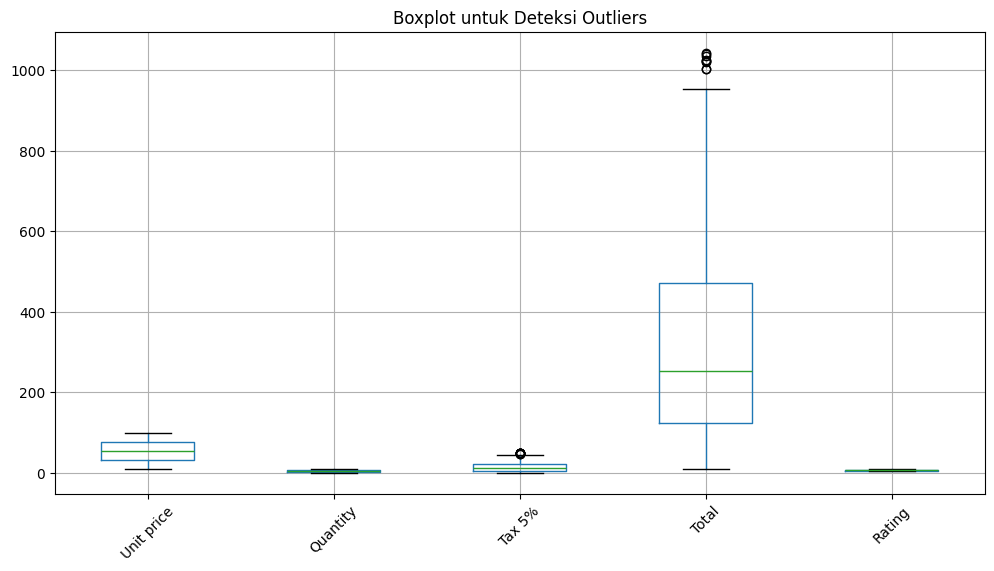

In [ ]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"📌 {column} - Jumlah Outliers: {len(outliers)}")
    return outliers

# Pilih kolom numerik untuk dicek outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Cek outliers di setiap kolom numerik
outlier_dict = {}
for col in numerical_columns:
    outlier_dict[col] = detect_outliers_iqr(df, col)

# Plot boxplot untuk visualisasi outliers
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outliers")
plt.show()

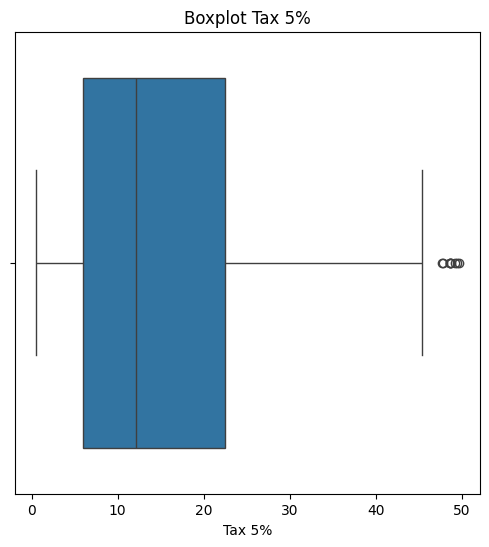

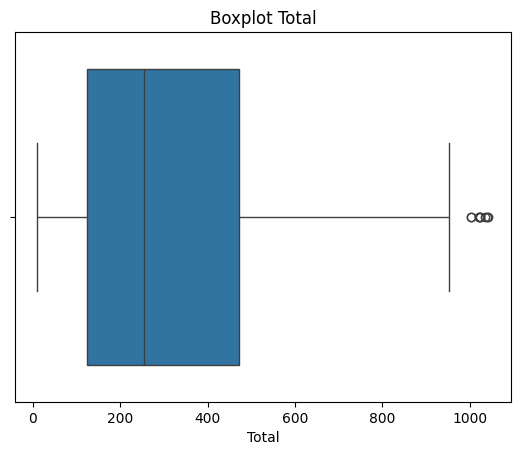

In [ ]:
cols_with_outliers = ["Tax 5%", "Total"]

plt.figure(figsize=(6, 6))
for col in cols_with_outliers:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()


=== 🎯 Univariate Analysis untuk Categorical Features ===


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


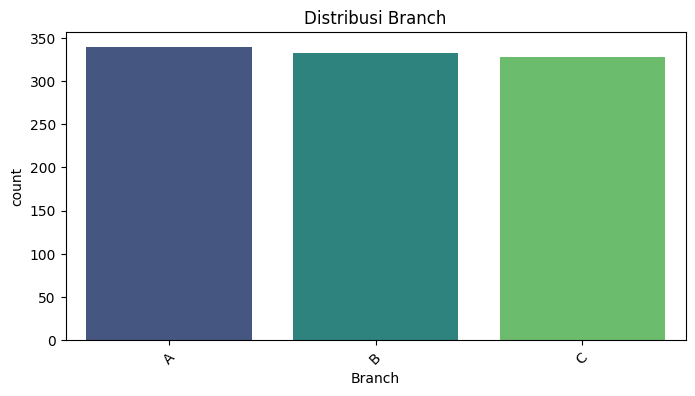


📌 Branch - Unique Values:
 Branch
A    340
B    332
C    328
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


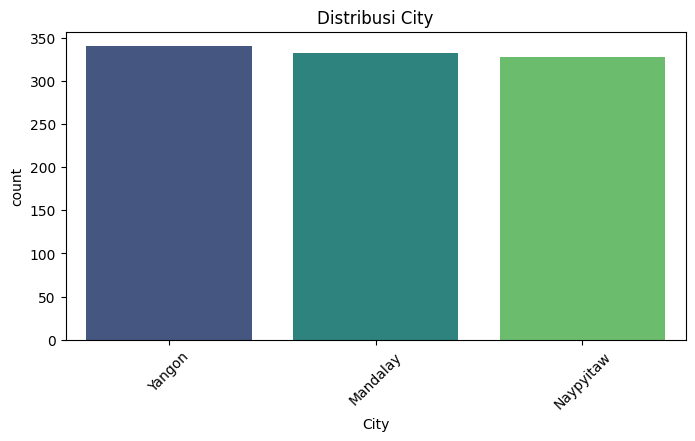


📌 City - Unique Values:
 City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


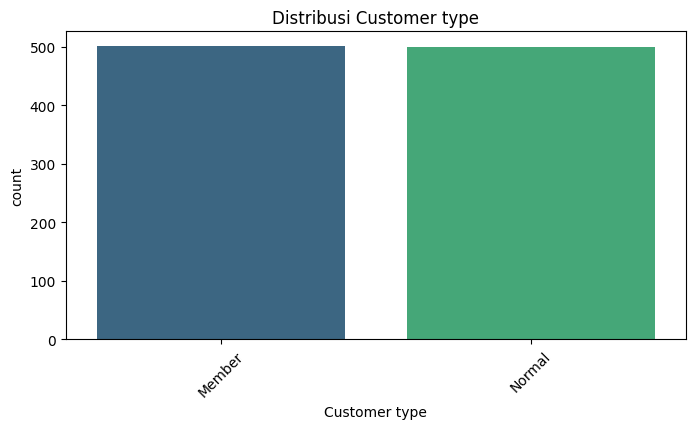


📌 Customer type - Unique Values:
 Customer type
Member    501
Normal    499
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


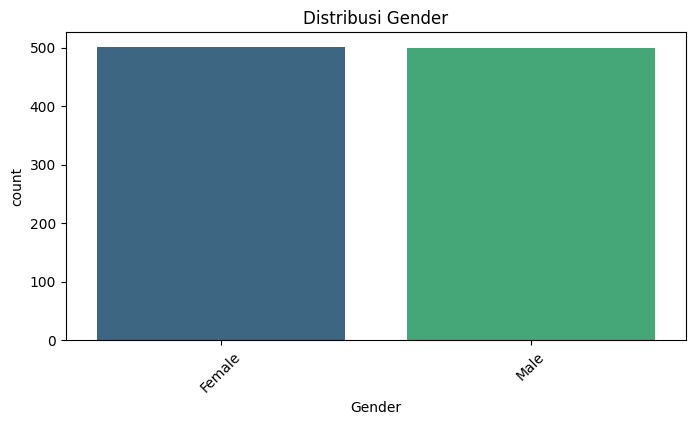


📌 Gender - Unique Values:
 Gender
Female    501
Male      499
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


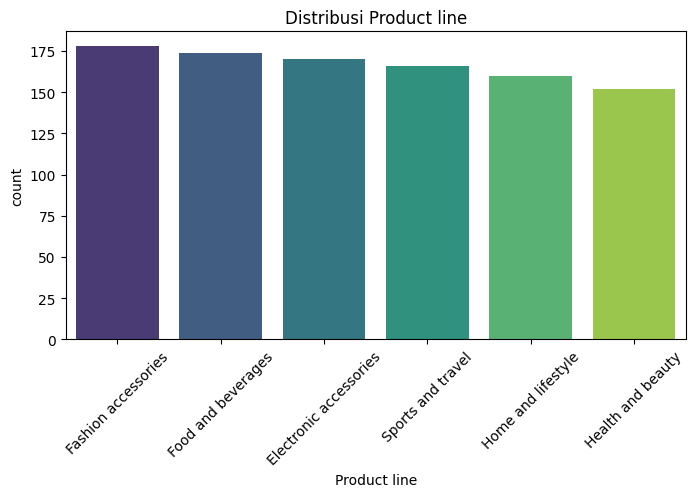


📌 Product line - Unique Values:
 Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-10-2d7265d51148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


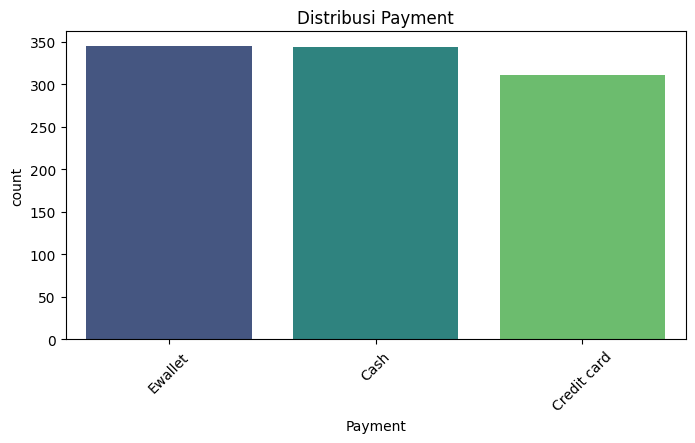


📌 Payment - Unique Values:
 Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
--------------------------------------------------

=== 📈 Univariate Analysis untuk Numerical Features ===


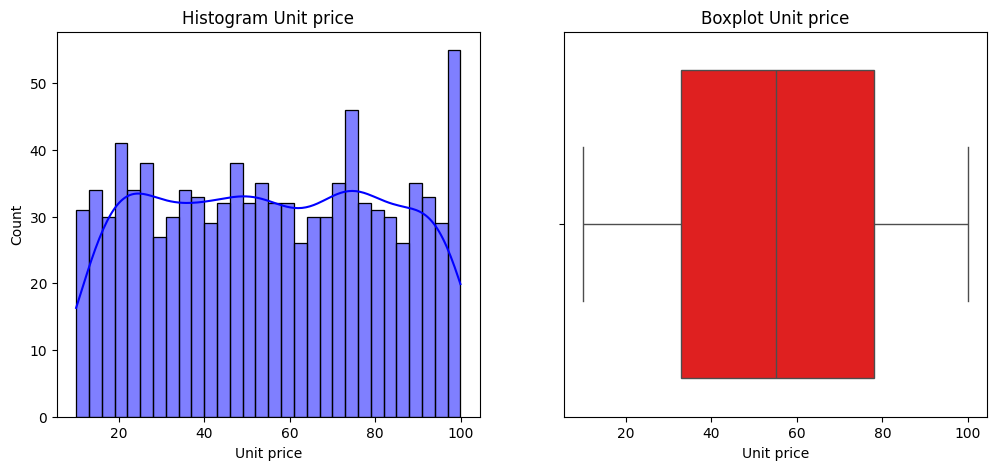


📊 Unit price - Statistik Deskriptif:
 count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64
--------------------------------------------------


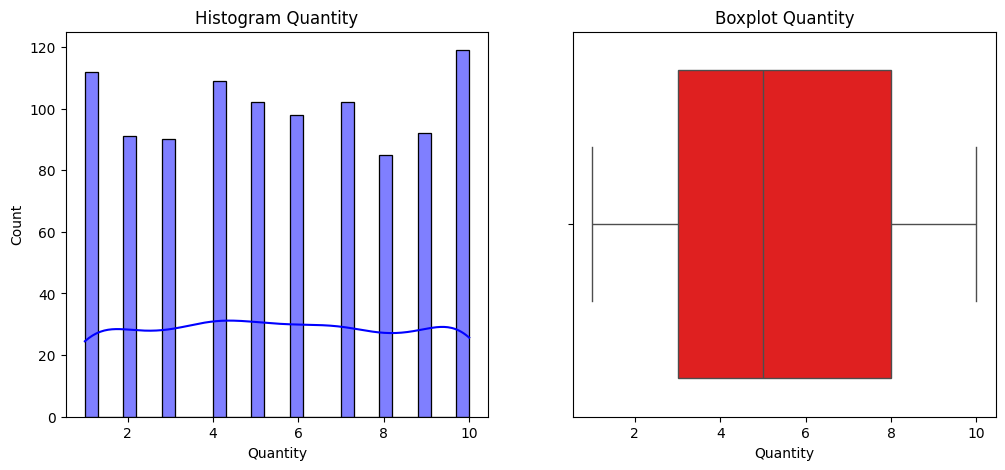


📊 Quantity - Statistik Deskriptif:
 count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64
--------------------------------------------------


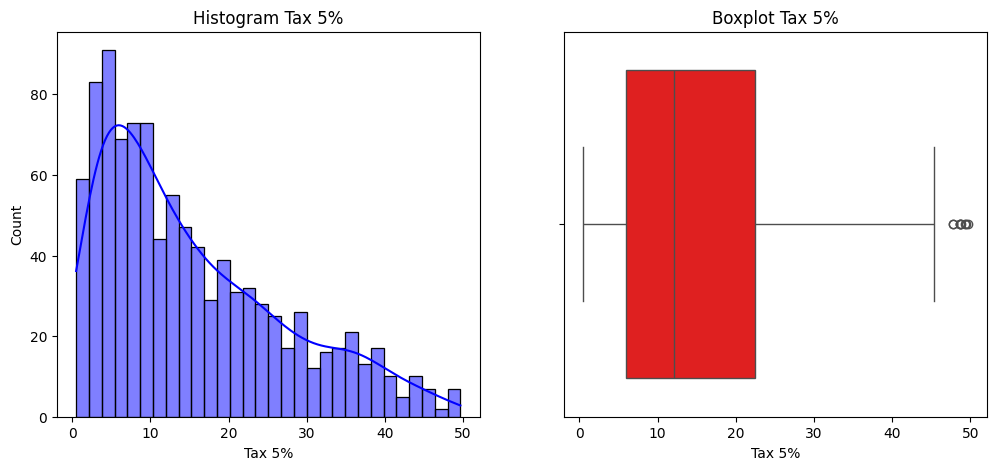


📊 Tax 5% - Statistik Deskriptif:
 count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64
--------------------------------------------------


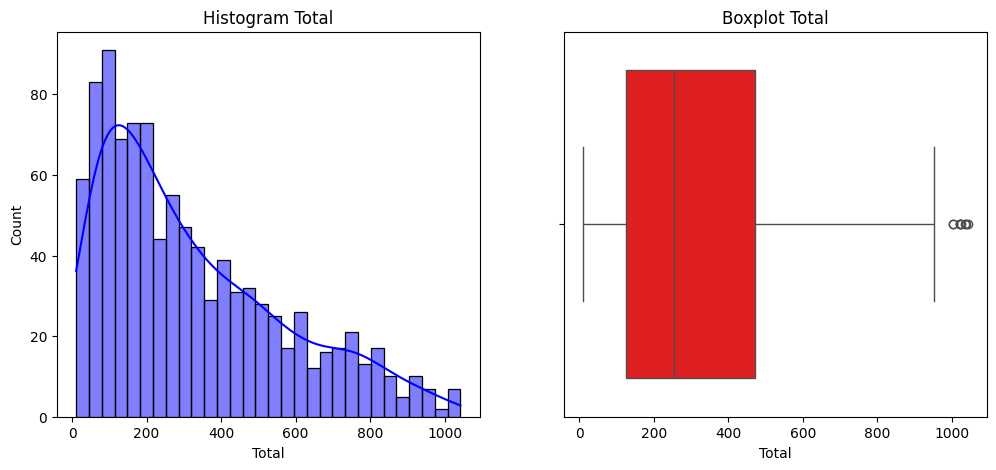


📊 Total - Statistik Deskriptif:
 count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64
--------------------------------------------------


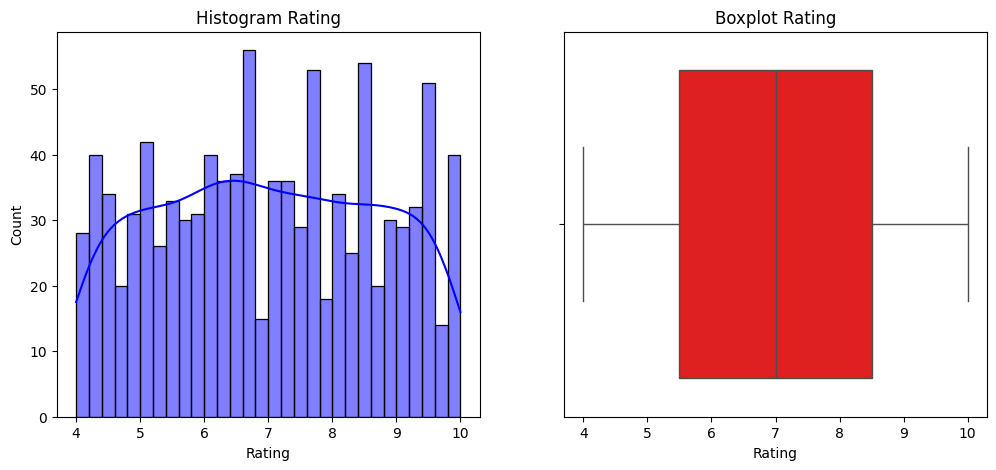


📊 Rating - Statistik Deskriptif:
 count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64
--------------------------------------------------


In [ ]:
# Pisahkan categorical & numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Univariate Analysis untuk Categorical Features
def analyze_categorical_features(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)
        plt.show()
        print(f"\n📌 {col} - Unique Values:\n", df[col].value_counts())
        print("-" * 50)

# Univariate Analysis untuk Numerical Features
def analyze_numerical_features(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Histogram {col}")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='red')
        plt.title(f"Boxplot {col}")

        plt.show()
        print(f"\n📊 {col} - Statistik Deskriptif:\n", df[col].describe())
        print("-" * 50)

# Panggil fungsi analisis
print("\n=== 🎯 Univariate Analysis untuk Categorical Features ===")
analyze_categorical_features(df, categorical_cols)

print("\n=== 📈 Univariate Analysis untuk Numerical Features ===")
analyze_numerical_features(df, numerical_cols)


=== 🎯 Multivariate Analysis untuk Categorical Features vs Target ===


<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


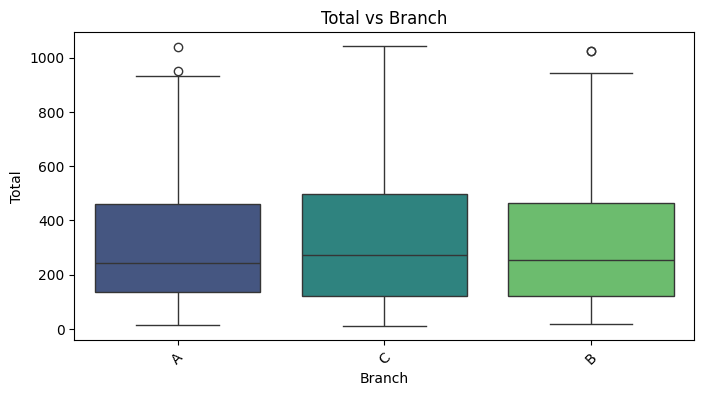


📌 Branch vs Total - Statistik Grup:
         count        mean         std      min         25%        50%  \
Branch                                                                  
A       340.0  312.354031  231.640025  12.6945  137.489625  240.82800   
B       332.0  319.872506  242.447565  18.6375  119.936250  252.88200   
C       328.0  337.099715  263.160870  10.6785  121.474500  271.41975   

               75%      max  
Branch                       
A       459.340875  1039.29  
B       465.585750  1022.49  
C       495.754875  1042.65  
--------------------------------------------------


<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


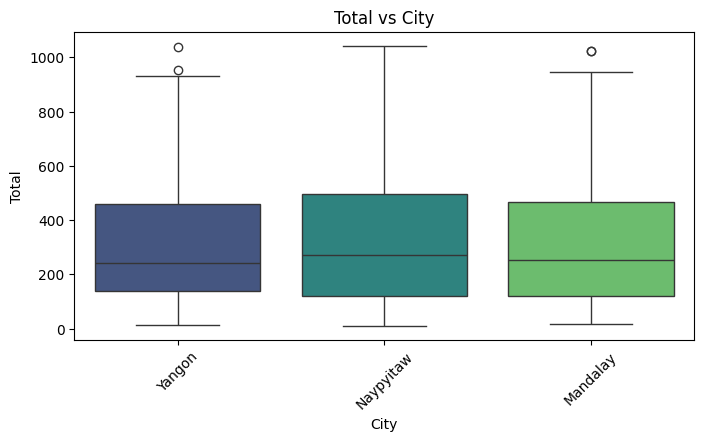


📌 City vs Total - Statistik Grup:
            count        mean         std      min         25%        50%  \
City                                                                       
Mandalay   332.0  319.872506  242.447565  18.6375  119.936250  252.88200   
Naypyitaw  328.0  337.099715  263.160870  10.6785  121.474500  271.41975   
Yangon     340.0  312.354031  231.640025  12.6945  137.489625  240.82800   

                  75%      max  
City                            
Mandalay   465.585750  1022.49  
Naypyitaw  495.754875  1042.65  
Yangon     459.340875  1039.29  
--------------------------------------------------


<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


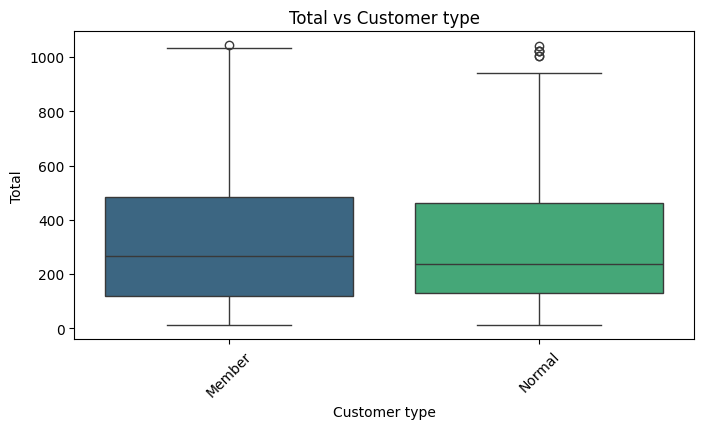


📌 Customer type vs Total - Statistik Grup:
                count        mean         std      min      25%      50%  \
Customer type                                                             
Member         501.0  327.791305  247.993782  10.6785  118.251  266.028   
Normal         499.0  318.122856  243.902800  12.6945  129.234  237.426   

                    75%      max  
Customer type                     
Member         485.5725  1042.65  
Normal         462.6090  1039.29  
--------------------------------------------------


<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


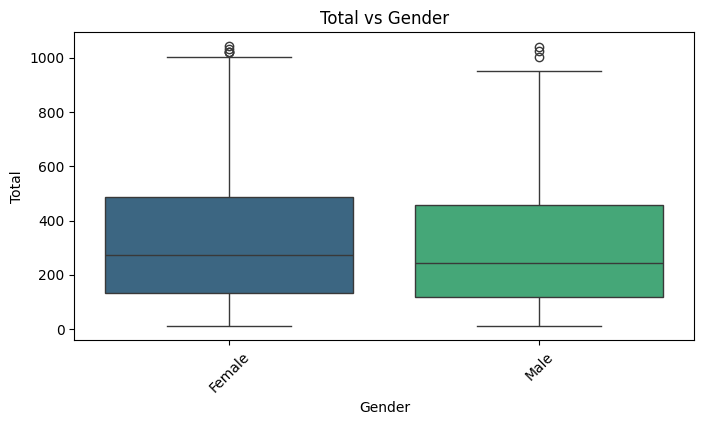


📌 Gender vs Total - Statistik Grup:
         count        mean         std      min       25%     50%      75%  \
Gender                                                                      
Female  501.0  335.095659  249.324401  12.6945  132.7620  272.58  486.444   
Male    499.0  310.789226  242.021730  10.6785  117.9465  244.23  456.834   

            max  
Gender           
Female  1042.65  
Male    1039.29  
--------------------------------------------------


<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


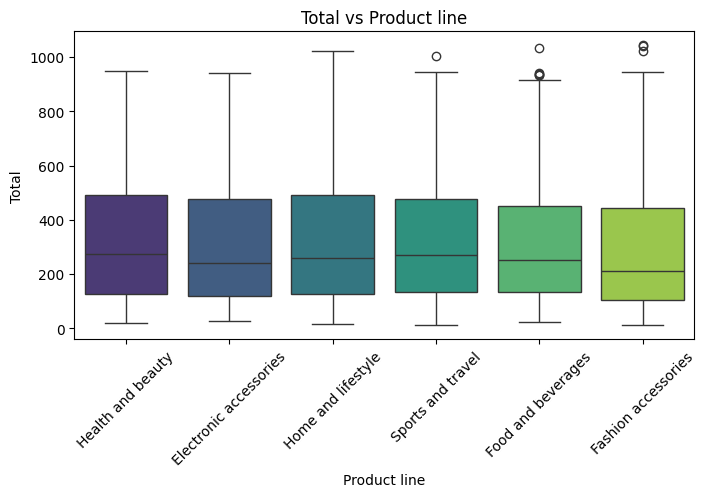


📌 Product line vs Total - Statistik Grup:
                         count        mean         std      min         25%  \
Product line                                                                 
Electronic accessories  170.0  319.632538  245.945626  26.7225  118.503000   
Fashion accessories     178.0  305.089298  243.564130  12.6945  106.155000   
Food and beverages      174.0  322.671517  247.157780  22.6590  134.904000   
Health and beauty       152.0  323.643020  237.538815  18.6375  125.666625   
Home and lifestyle      160.0  336.636956  254.600671  14.6790  126.076125   
Sports and travel       166.0  332.065220  248.375328  10.6785  133.260750   

                              50%         75%        max  
Product line                                              
Electronic accessories  241.21650  475.823250   942.4485  
Fashion accessories     211.64850  442.690500  1042.6500  
Food and beverages      252.48825  452.647125  1034.4600  
Health and beauty       272.30700  4

<ipython-input-11-c73dbc709e15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette="viridis")


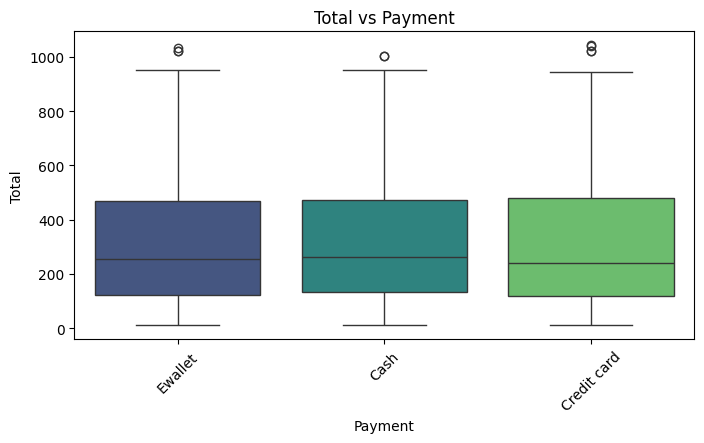


📌 Payment vs Total - Statistik Grup:
              count        mean         std      min         25%      50%  \
Payment                                                                    
Cash         344.0  326.181890  242.660640  10.6785  132.712125  262.962   
Credit card  311.0  324.009878  257.106200  12.6945  118.156500  239.589   
Ewallet      345.0  318.820600  239.305694  13.4190  122.472000  253.680   

                    75%      max  
Payment                           
Cash         473.515875  1003.59  
Credit card  478.784250  1042.65  
Ewallet      469.413000  1034.46  
--------------------------------------------------

=== 📈 Multivariate Analysis untuk Numerical Features ===


<Figure size 1200x600 with 0 Axes>

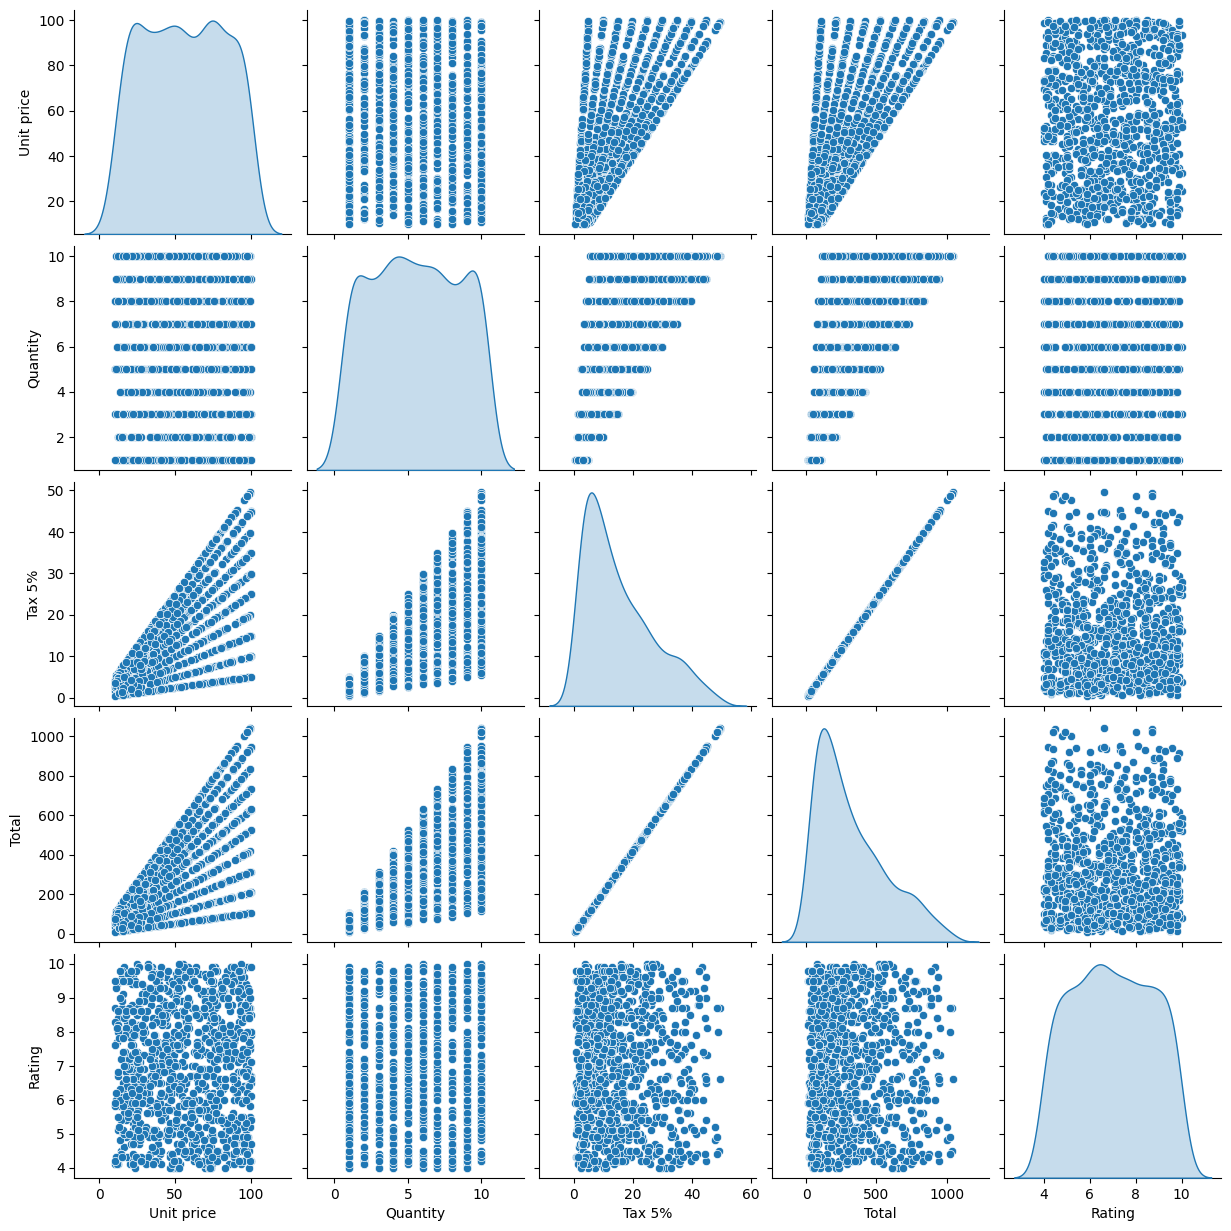

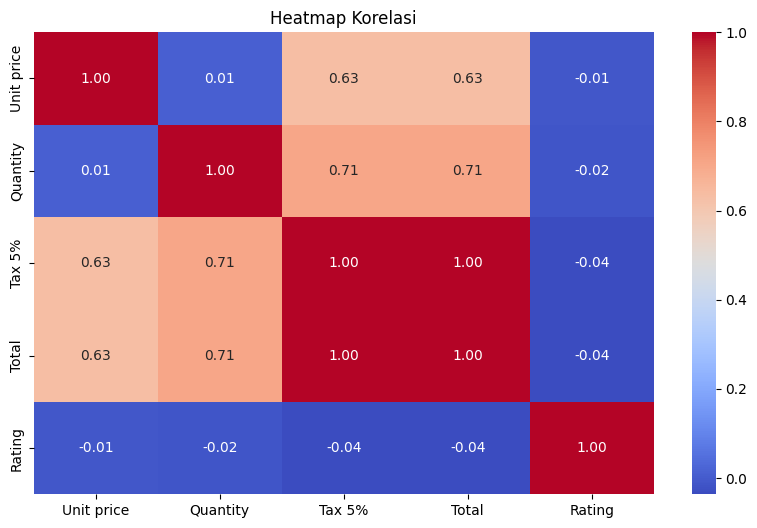

In [ ]:
# Pisahkan categorical & numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Multivariate Analysis untuk Categorical Features
def analyze_categorical_multivariate(df, categorical_cols, target_col):
    for col in categorical_cols:
        if col != target_col:  # Hindari memplot target sebagai independent
            plt.figure(figsize=(8, 4))
            sns.boxplot(data=df, x=col, y=target_col, palette="viridis")
            plt.title(f"{target_col} vs {col}")
            plt.xticks(rotation=45)
            plt.show()

            print(f"\n📌 {col} vs {target_col} - Statistik Grup:\n", df.groupby(col)[target_col].describe())
            print("-" * 50)

# Multivariate Analysis untuk Numerical Features
def analyze_numerical_multivariate(df, numerical_cols):
    # Pairplot untuk melihat hubungan antar numerical features
    plt.figure(figsize=(12, 6))
    sns.pairplot(df[numerical_cols], diag_kind="kde")
    plt.show()

    # Heatmap Korelasi
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi")
    plt.show()

# Tentukan target untuk analisis kategori
target_col = "Total"

print("\n=== 🎯 Multivariate Analysis untuk Categorical Features vs Target ===")
analyze_categorical_multivariate(df, categorical_cols, target_col)

print("\n=== 📈 Multivariate Analysis untuk Numerical Features ===")
analyze_numerical_multivariate(df, numerical_cols)

#Data Preparation

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['Branch'], prefix='Branch')], axis=1)
df = pd.concat([df, pd.get_dummies(df['City'], prefix='City')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Customer type'], prefix='Customer type')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Product line'], prefix='Product line')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Payment'], prefix='Payment')], axis=1)
df.drop(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], axis=1, inplace=True)
df.head()

,Unit price,Quantity,Tax 5%,Total,Date,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,2019-01-05,9.1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,15.28,5,3.8200,80.2200,2019-03-08,9.6,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,46.33,7,16.2155,340.5255,2019-03-03,7.4,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
3,58.22,8,23.2880,489.0480,2019-01-27,8.4,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
4,86.31,7,30.2085,634.3785,2019-02-08,5.3,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[['Unit price', 'Tax 5%']])
princ_comp = pca.transform(df[['Unit price', 'Tax 5%']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.91, 0.09])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Unit price','Tax 5%']])
df['dimension'] = pca.transform(df.loc[:, ('Unit price','Tax 5%')]).flatten()
df.drop(['Unit price','Tax 5%'], axis=1, inplace=True)

In [ ]:
df.head()

,Quantity,Total,Date,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,dimension
0,7,548.9715,2019-01-05,9.1,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,21.367963
1,5,80.2200,2019-03-08,9.6,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,-42.000054
2,7,340.5255,2019-03-03,7.4,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,-8.663008
3,8,489.0480,2019-01-27,8.4,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,4.799289
4,7,634.3785,2019-02-08,5.3,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,33.672613


In [ ]:
X = df.drop(["Total"],axis =1)
y = df["Total"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 1000
Total of sample in train dataset: 800
Total of sample in test dataset: 200


In [ ]:
numerical_features = ['Quantity', 'Rating', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Quantity,Rating,dimension
512,0.510116,1.333827,-0.009633
685,-1.203120,-0.361592,-0.340842
997,-1.545767,0.398423,-0.972140
927,1.195410,-0.127741,-0.527979
376,1.195410,1.509215,-0.694893


In [ ]:
X_train[numerical_features].describe().round(4)

,Quantity,Rating,dimension
count,800.0000,800.0000,800.0000
mean,-0.0000,-0.0000,0.0000
std,1.0006,1.0006,1.0006
min,-1.5458,-1.7647,-1.7052
25%,-0.8605,-0.8293,-0.8889
50%,-0.1752,-0.0108,-0.0168
75%,0.8528,0.8661,0.8400
max,1.5381,1.7431,1.8752


In [ ]:
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

#Model Development

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=123, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-26-0615151fc0c1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.16746881  1.53805751  0.51011598 -0.51782554  1.53805751 -1.20311989
 -0.51782554  1.53805751  0.16746881 -1.54576707 -1.54576707  0.51011598
  1.19541033 -0.51782554 -1.54576707 -0.51782554  1.53805751  1.19541033
  0.16746881 -1.54576707  0.16746881 -1.54576707  0.85276316  0.51011598
 -0.86047272  0.51011598  0.51011598  0.51011598  1.53805751  1.53805751
 -0.86047272  0.85276316  1.53805751 -0.17517837 -0.51782554 -1.20311989
  1.19541033  0.16746881 -1.54576707  0.16746881  0.51011598  1.19541033
 -0.86047272  0.16746881  0.51011598  0.51011598 -0.86047272 -0.51782554
  0.51011598  0.51011598 -1.54576707 -0.51782554  0.85276316 -0.51782554
  1.53805751 -1.20311989 -1.20311989  1.53805751  1.19541033 -1.54576707
  1.19541033 -1.54576707  0.85276316  0.85276316  1.53805751  1.53805751
 -0.17517837 -1.54576707 -1.20311989 -0.1751

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e2
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e2

mse

,train,test
KNN,55.871947,64.153406
RF,0.138889,0.852385
Boosting,35.692844,41.582888


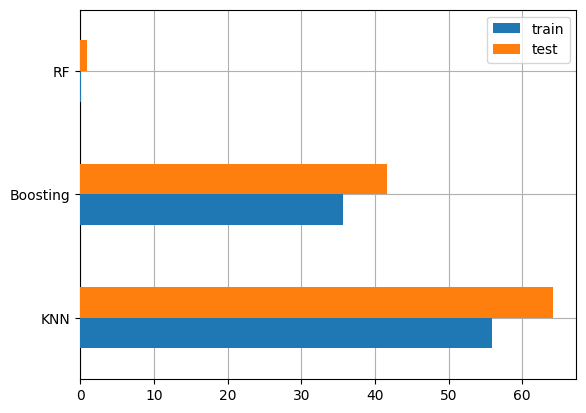

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
131,580.419,595.5,583.8,592.4
